# Importing Libraries and Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Final+Test+Data+Set.csv')

# Data exploration

In [3]:
df.head()  # retrieve the first five rows to get an idea about the data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape  # to see the number of rows and columns

(614, 13)

In [5]:
df.info() # to see all feature names and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


It seems that there are missing values in a lot of the columns, so let us try and fill those values

# Handling Missing Values

In [6]:
nullSum = df.isnull().sum()
nullSum = nullSum[nullSum > 0]
nullSum

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

We have 7 features with missing values

In [7]:
df[nullSum.index].dtypes

Gender               object
Married              object
Dependents           object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
dtype: object

In [8]:
df['Credit_History'].value_counts() # this is a categorical variable

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [9]:
df['LoanAmount'].value_counts()  # this is a continuous variable

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [10]:
df['Loan_Amount_Term'].value_counts() # this is a discrete variable

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

We see that 6 features are categorical and 1 are continuous, we will fill the missing values accordingly 

In [11]:
df['LoanAmount'].fillna(np.mean(df['LoanAmount']), inplace = True) # since the loan amount is a continuous value ,
# we fill the missing values with mean of the column

In [12]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True) #This variable it has discrete values,
# so we replace the missing values with the mode of this column

In [13]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

In [14]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)

In [15]:
df['Married'].fillna(df['Married'].mode()[0], inplace = True)

In [16]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

In [17]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

In [18]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

We will replace the plus sign from the 3 and keep it as 3 , since it is a single entity.
This way we can change the data type of dependents column to int64

In [19]:
df['Dependents'] = df['Dependents'].replace('[+]', '', regex = True)
df['Dependents'] = df['Dependents'].astype('int64')

In [20]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We have successfully filled the na values.

# Univariate Analysis

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>, <AxesSubplot:>]],
      dtype=object)

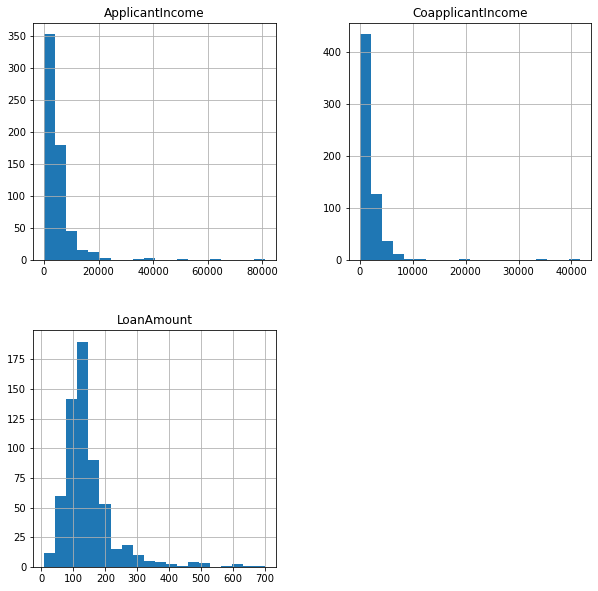

In [21]:
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].hist(figsize = (10,10), bins = 20)

We can see that the Loan Amount is a right skewed normal distribution graph , because less people appply for a high amount of loan

We can also see that income graphs are also skewed, which also makes sense because there are lesser people who are at higher positions and earn more.

Lets look at the categorical variables now

([<matplotlib.patches.Wedge at 0x1a55ddca4c0>,
 [Text(-0.6105420895241798, 0.9150072988339757, 'Y'),
  Text(0.6105420038550106, -0.9150073559970479, 'N')],
 [Text(-0.33302295792227987, 0.4990948902730776, '68.7%'),
  Text(0.3330229111936421, -0.49909492145293516, '31.3%')])

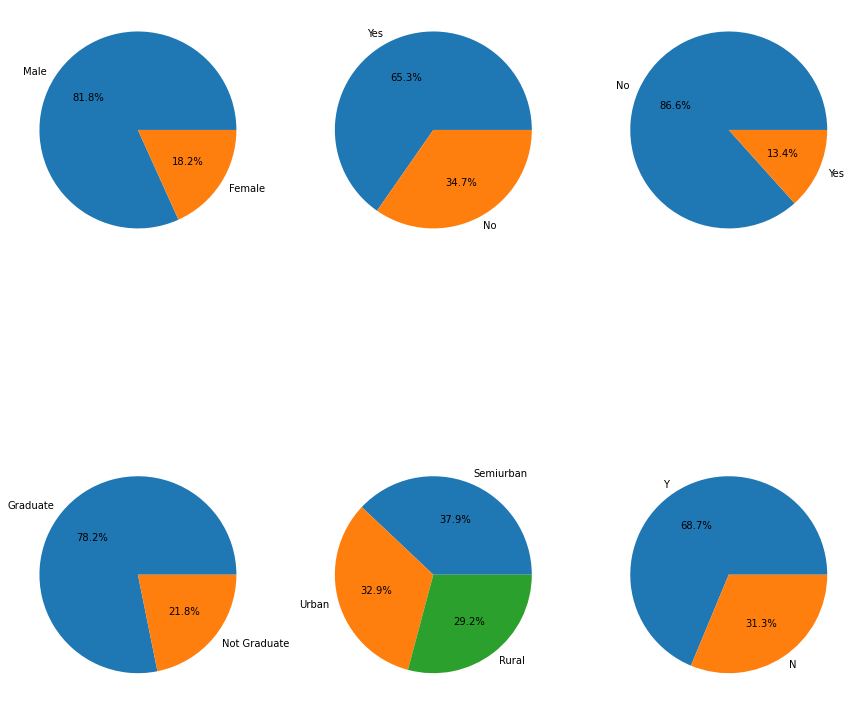

In [22]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize = (15,15))

values = df['Gender'].value_counts().tolist()
labels = df['Gender'].value_counts().index.tolist()
ax1.pie(values, labels = labels, autopct = '%1.1f%%')

values = df['Married'].value_counts().tolist()
labels = df['Married'].value_counts().index.tolist()
ax2.pie(values, labels = labels, autopct = '%1.1f%%')

values = df['Self_Employed'].value_counts().tolist()
labels = df['Self_Employed'].value_counts().index.tolist()
ax3.pie(values, labels = labels, autopct = '%1.1f%%')

values = df['Education'].value_counts().tolist()
labels = df['Education'].value_counts().index.tolist()
ax4.pie(values, labels = labels, autopct = '%1.1f%%')

values = df['Property_Area'].value_counts().tolist()
labels = df['Property_Area'].value_counts().index.tolist()
ax5.pie(values, labels = labels, autopct = '%1.1f%%')

values = df['Loan_Status'].value_counts().tolist()
labels = df['Loan_Status'].value_counts().index.tolist()
ax6.pie(values, labels = labels, autopct = '%1.1f%%')

Now that we have a fair bit of idea about the variables let us do some bivariate analysis to see trends in our data

# Bivariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

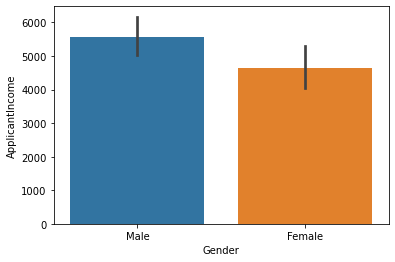

In [23]:
sns.barplot(df['Gender'], df['ApplicantIncome'])

Average income of males here is higher than females, but we can't make any inferences from it because in our data we have only about 18% females.

In [24]:
table = pd.crosstab(df['Loan_Status'], df['Gender'])
pctFemales = table.loc['Y','Female'] / len(df[df['Gender'] == 'Female']) * 100
pctMales = table.loc['Y', 'Male'] / len(df[df['Gender'] == 'Male']) * 100
print(table, '\n', pctFemales, pctMales)

Gender       Female  Male
Loan_Status              
N                37   155
Y                75   347 
 66.96428571428571 69.12350597609563


So the percentage of males and females who got the loan approval is similar.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

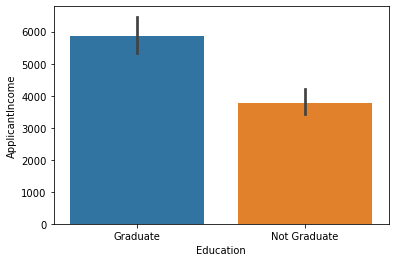

In [25]:
sns.barplot(df['Education'], df['ApplicantIncome'])

Another insight we get here is that graduates earn more , so they probably will be more eligible to take loan

<AxesSubplot:>

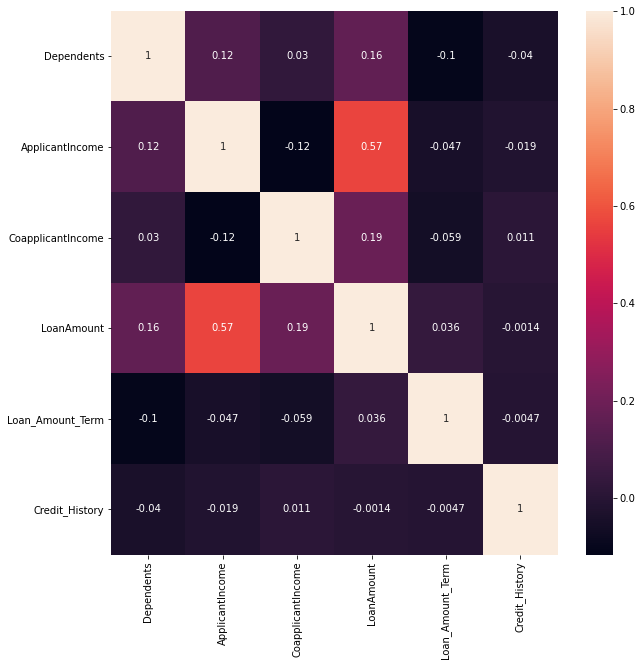

In [26]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Convert Categorical to Numerical 

In [28]:
X = df.drop(['Loan_ID', 'Loan_Status'], axis = 1)
X = pd.get_dummies(X, drop_first = True)

Y = df['Loan_Status']

We will now do a Train Test split on our dataset before predictive modeling

In [29]:
from sklearn.model_selection import train_test_split

Xtrain , Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2)

In [30]:
Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape

((491, 12), (491,), (123, 12), (123,))

# Predictive Modelling

## Decision Trees

In [31]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

In [32]:
yhat = dtc.predict(Xtest)

In [33]:
yhat

array(['N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y'], dtype=object)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(Ytest, yhat)

0.7723577235772358

The decision tree model gives us an accuracy of 62% on our test data

## Random Forest Classifier And Hyperparameter Tuning Using Randomized Search CV

In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [36]:
# Hyperparameters

n_estimators = [int(x) for x in np.linspace(100,1200,12)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5,30,6)]

min_samples_split = [2,5,10,15,100]

min_samples_leaf = [1,2,5,10]

In [37]:
# Grid for the RandomizedSearchCV object 
randomgrid = {'n_estimators' : n_estimators, 'max_features' : max_features, 'max_depth' : max_depth,
              'min_samples_split' : min_samples_split, 'min_samples_leaf' : min_samples_leaf}

In [38]:
from sklearn.model_selection import RandomizedSearchCV
rfc_random = RandomizedSearchCV(rfc ,randomgrid, scoring = 'accuracy', n_iter = 10, cv = 5, verbose = 2, n_jobs = 1)

In [39]:
rfc_random.fit(Xtrain, Ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1100; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1100; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1100; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1100; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1100; total time=   5.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='accuracy', verbose=2)

In [46]:
rfc_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 10}

In [51]:
rfc_random.best_score_

0.8084724799010512

In [47]:
rfcfinal = RandomForestClassifier(n_estimators= 1100,
                                  min_samples_split = 5,
                                  min_samples_leaf = 5,
                                  max_features= 'sqrt',
                                  max_depth= 10)

In [48]:
rfcfinal.fit(Xtrain, Ytrain)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_estimators=1100)

In [49]:
yhatrfc = rfcfinal.predict(Xtest)

In [50]:
accuracy_score(yhatrfc, Ytest)

0.8130081300813008

Here we see a higher accuracy with more reliable results from the Random Forest Classifier Model

# Extreme Gradient Boosting Model with Grid Search CV

In [52]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

we will first fix a learning rate and then tune n_estimators

In [61]:
paramtest1 = {'n_estimators' : range(100,1000,10)}
gridtest1 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1, objective = 'binary:logistic'),
                         param_grid = paramtest1, scoring = 'accuracy', n_jobs = 4, cv = 5)

In [62]:
gridtest1.fit(Xtrain, Ytrain)

[12:10:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [63]:
gridtest1.best_params_

{'n_estimators': 110}

In [68]:
paramtest2 = {'max_depth' : range(3,10),
             'min_child_weight' : range(1,6)}
gridtest2 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1,
                                                  n_estimators = 110, objective = 'binary:logistic',verbosity = 2),
                        param_grid = paramtest2, scoring = 'accuracy', n_jobs = 4, cv = 5)

In [69]:
gridtest2.fit(Xtrain, Ytrain)

[12:18:43] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[12:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:18:43] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:18:43] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[12:18:43] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[12:18:4

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=110, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [70]:
gridtest2.best_params_

{'max_depth': 3, 'min_child_weight': 2}

In [75]:
paramtest3 = {'gamma' : [i/100.0 for i in range(1,50)]}
gridtest3 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1,
                                                  n_estimators = 110, max_depth = 3, min_child_weight = 2,
                                                  objective = 'binary:logistic'),
                        param_grid = paramtest3,scoring = 'accuracy', n_jobs = 4, cv = 5)

In [76]:
gridtest3.fit(Xtrain, Ytrain)

[12:21:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[12:21:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 2 pruned nodes, max_depth=3
[12:21:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[12:21:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[12:21:

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=2,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=110, n_jobs=None,
                                     n...one, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=N

In [77]:
gridtest3.best_params_

{'gamma': 0.21}

In [84]:
paramtest4 = {'subsample':[i/10.0 for i in range(2,10)],
              'colsample_bytree':[i/10.0 for i in range(2,10)]}
gridtest4 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1,
                                                   n_estimators = 110,
                                                  max_depth = 3, min_child_weight = 2,
                                                  gamma = 0.21, objective = 'binary:logistic'),
                        param_grid = paramtest4, scoring = 'accuracy', n_jobs = 4, cv = 5)

In [85]:
gridtest4.fit(Xtrain,Ytrain)

[12:35:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[12:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:35:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[12:35:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:35:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:35:36]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=0.21,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=2,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=110, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, valida

In [86]:
gridtest4.best_params_

{'colsample_bytree': 0.3, 'subsample': 0.2}

In [87]:
paramtest5 = {'reg_alpha' : [0.001,0.005,0.01,0.05,0.1,0.5,1]}
gridtest5 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1,
                                                   n_estimators = 110,
                                                  max_depth = 3, min_child_weight = 2,
                                                  gamma = 0.21, objective = 'binary:logistic',
                                                  colsample_bytree = 0.3, subsample = 0.2),
                        param_grid = paramtest5, scoring = 'accuracy', n_jobs = 4, cv = 5)

In [88]:
gridtest5.fit(Xtrain,Ytrain)

[12:37:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[12:37:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[12:37:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:37:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:37:57]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.3, gamma=0.21,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=2,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=110, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.2,
                                     tree_method=None, validate

In [90]:
gridtest5.best_params_

{'reg_alpha': 0.001}

In [99]:
paramtest6 = {'learning_rate' : [i/100 for i in range(1,500,10)]}
gridtest6 = GridSearchCV(estimator = XGBClassifier(n_estimators = 110,
                                                  max_depth = 3, min_child_weight = 2,
                                                  gamma = 0.21, objective = 'binary:logistic'
                                                  ,colsample_bytree = 0.3, subsample = 0.2, reg_alpha = 0.001),
                        param_grid = paramtest6, scoring = 'accuracy', n_jobs = 4, cv = 5)

In [100]:
gridtest6.fit(Xtrain, Ytrain)

[12:46:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[12:46:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:46:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[12:46:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 4 pruned nodes, max_depth=0
[12:46:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:46:16]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.3, gamma=0.21,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=2,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=110, n_jobs=None,
                                     n...state=None,
                                     reg_alpha=0.001, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.2,
                                     tree_method=None, validate_parameters=None,
       

In [101]:
gridtest6.best_params_

{'learning_rate': 0.11}

We now have the best possibe hyperparameter values so lets train the final model and evaluate it on test set

In [102]:
xgbfinal = XGBClassifier(learning_rate = 0.11,
                        n_estimators = 110,
                        max_depth = 3, min_child_weight = 2,
                        gamma = 0.21, objective = 'binary:logistic',
                        colsample_bytree = 0.3, subsample = 0.2, 
                        reg_alpha = 0.001)

In [103]:
xgbfinal.fit(Xtrain, Ytrain)

[12:46:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[12:46:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:46:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[12:46:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 4 pruned nodes, max_depth=0
[12:46:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:46:58]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.21, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.11, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=110, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1, subsample=0.2,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
yhatxgb = xgbfinal.predict(Xtest)

In [105]:
accuracy_score(yhatxgb, Ytest)

0.8048780487804879